# INTRODUCTION

## NO SHOW APPOINTMENTS DATASET

This dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
The dataset contains 110527 rows of data and 14 columns, which are further discussed below:
PatientId      : tells us what the patient id is    
AppointmentID  :tells us what their unique appointment id is
Gender         : tells us the patients gender, whether its female,F or male,M
ScheduledDay   : tells us on what day the patient set up their appointment.   
AppointmentDay : tells us what day the appointment was scheduled for 
Age            : tells us the age of the patient  
Neighbourhood  : tells us the location of the hospital  
Scholarship    :tells us whether the patient is in the brasilian welfare program  
Hipertension   : tells us if the patient is hypertensive, 1 for yes, 0 for no
Diabetes       : tells us if the patient is diabetic, 1 for yes, 0 for no   
Alcoholism     : tells us if the patient is alcoholic, 1 for yes, 0 for no   
Handcap        : tells us if the patient is handicapped, 1 for yes, 0 for no   
SMS_received   : tells us if the patient received an SMS, 1 for yes, 0 for no  
No-show        : tells us whther the patient showed up for their appointments, NO, for they did show up and YES when they                        didn't show up

### QUESTIONS
    >which age is the most frequent
    >Which Loctaion appears the most?
    > How many patients are hypertensive?
    > How many patients are diabetic?
    > How many patients are alcoholic?
    > How many patients received SMS?
    >Which gender does not show up more for appointments?
    >What age group show up more
    >Does hospital location affect if a patient show up for their appointments
    >If they're in the welfare program, do they show up
    >If hypertensive, do they show up
    >If diabetic, do they show up
    >If alcoholic, do they show up
    >If handicapped, do they show up
    >If they receive SMS, do they show up
    
    
    

In [113]:
#importing the neccessary packages needed for the data analysis and visualizations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [114]:
df= pd.read_csv(r'C:\Users\ARAKAH\Downloads\Nanodegree\noshowappointments-kagglev2-may-2016.csv')

## DATA WRANGLING

In [115]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [116]:
#delete unused columns not needed for exploration
del df['PatientId']
del df['AppointmentID']

In [117]:
#to check if all the column has the right dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [118]:
pd.isnull('df')#returns True if there is null values
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the information given above, it can be seen that there is no missing values in the dataset

In [119]:
#check for duplicated values
df.duplicated().sum()

635

In [120]:
#delete duplicated values
df.drop_duplicates(inplace = True)

In [121]:
#to check the dataframe's dimension
df.shape

(109892, 12)

In [122]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000
mean,37.089506,0.098287,0.197248,0.071825,0.030430,0.022131,0.322881
std,23.121196,0.297704,0.397923,0.258199,0.171768,0.160878,0.467580
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [123]:
#discovered the minimum value for Age column is -1,confirming the age value
df['Age'].unique()
df[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [124]:
df=df.drop(df[df['Age']== 0].index)
#drop the column containing -1 as an age value
#df.drop(df[df['Age'] == '-1'],errors='ignore');

df=df.drop(99832)

In [125]:
#determine how many unique values are in eacxh columns
df.nunique()

Gender                 2
ScheduledDay      100307
AppointmentDay        27
Age                  102
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [126]:
#A function for converting date
def convert_date(x):
    from datetime import datetime  #firstly, import the required package
    df[x] = pd.to_datetime(df[x])  #convert to datetime format from string
    df[x] = df[x].dt.date          #extract just the date from the datetime

In [127]:
#convert the string scheduled date and appointment date to iso time format
convert_date('ScheduledDay')
convert_date('AppointmentDay')

In [128]:
#to confirm the changes
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [129]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [130]:
#dropping handcap column because of wrong values, values should be either true or false not an array of 5 values
df.drop(['Handcap'],axis=1, inplace=True)

In [131]:
#get a true or false column, to allow for easier analysis
df['No-show_yes'] = df["No-show"] =="Yes"
#confirm if the changes have been effected
df.head(2)
df.tail(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,No-show_yes
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,1,No,False
110526,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,1,No,False


<b>NOTE: IN NO-SHOW_YES COLUMN:</b>
    TRUE signifies them not showing up for their appointment
    FALSE signifies them showing up for their appointment

In [132]:
#print the number of values in the no-show that is True
df['No-show_yes'].value_counts()

False    84899
True     21462
Name: No-show_yes, dtype: int64

<b>21680 patient did not show up for their appointment</b>

In [133]:
#create a new dataframe with data ofthose that didn't show up for their appointment
new_Df = df.drop(df[df['No-show'] == 'Yes' ].index)
new_Df.shape
new_Df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,No-show_yes
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No,False
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No,False


### Uni-variate Analysis

In [134]:
#creating a function for pie chart
def pie_chart(x,x_title):
    plt.pie(x.value_counts().nlargest(10), labels = x.value_counts().nlargest(10).index,autopct = '%1.0f%%');
    plt.title(x_title, fontsize = 15)

#### which age is the most frequent?

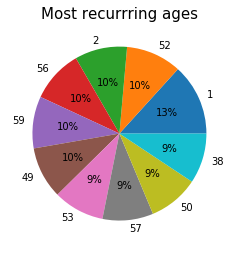

In [135]:
#determine top 10 most recurring ages
label = 'Most recurrring ages'
pie_chart(new_Df['Age'],label)

<b>The two most recurring age is 1</b>

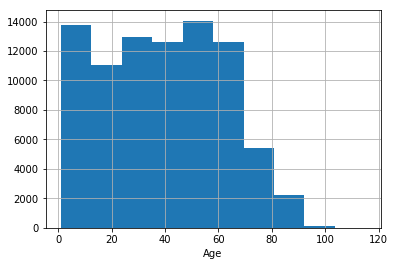

In [136]:
#determine the skewness of the dataset
#plot histogram chart of the Age column
new_Df['Age'].hist();
plt.xlabel('Age');

<b>The graph above shows that Age data is skewed to the right</b>

In [137]:
#to better confirm its skewness
new_Df['Age'].mean() > new_Df['Age'].median()

True

<b>Since the mean is greater than the median, the Age column is skewed to the right<b/>

#### Which Loctaion appears the most?

In [138]:
def count_values(x):
    y= new_Df[x].value_counts().nlargest(10)
    print(y)

In [139]:
count_values('Neighbourhood')

JARDIM CAMBURI     6092
MARIA ORTIZ        4368
RESISTÊNCIA        3337
JARDIM DA PENHA    3221
CENTRO             2574
SANTA MARTHA       2531
ITARARÉ            2491
TABUAZEIRO         2463
SANTO ANTÔNIO      2191
BONFIM             2153
Name: Neighbourhood, dtype: int64


<b>The most appeared location in the datset is <i> JARDIM CAMBURI</i> </b>

In [141]:
count_values('Hipertension')

0    66951
1    17948
Name: Hipertension, dtype: int64


#### How many patients are hypertensive?

18029 has hypertension

In [142]:
count_values('Diabetes')

0    78428
1     6471
Name: Diabetes, dtype: int64


#### How many patients are diabetic?

6513 has diabetic

In [143]:
count_values('Alcoholism')

0    82223
1     2676
Name: Alcoholism, dtype: int64


#### How many patients are Alcoholic?

2683 is alcoholic

In [144]:
count_values('SMS_received')

0    59882
1    25017
Name: SMS_received, dtype: int64


#### How many patients received SMS?

25017 received SMS

#### Which gender does not show up more for appointments?

In [145]:
M_F=count_values('Gender')
print(M_F)

F    55562
M    29337
Name: Gender, dtype: int64
None


<b> The female gender doesn't show up more </b>

In [146]:
M_F = new_Df['Gender'].value_counts()
print(M_F)

F    55562
M    29337
Name: Gender, dtype: int64


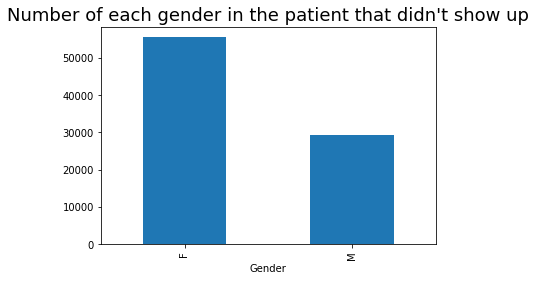

In [147]:
#visualize Gender column
M_F.plot.bar();
plt.xlabel('Gender');
plt.title("Number of each gender in the patient that didn't show up", fontsize=18);

### Bi-variate analysis

#### What age group show up more?

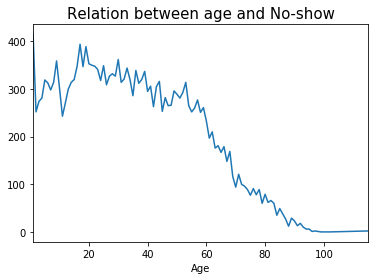

In [148]:
#Which age is more prone to not show up for appointment
df.groupby(['Age'])['No-show_yes'].sum().plot()
plt.title('Relation between age and No-show', fontsize=15);

Ages above 60 tend to show up more for appointments

#### Does hospital location affect if a patient show up for their appointments?

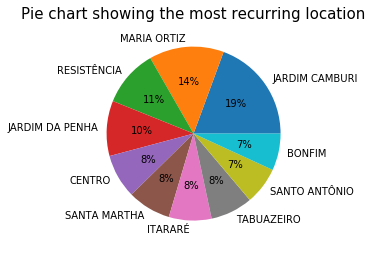

In [149]:
label ='Pie chart showing the most recurring location'
pie_chart(new_Df['Neighbourhood'],label)

Patients from JARDIM CAMBURI are more likely to not show up for apppointment

#### If they're in the welfare program, do they show up?

In [150]:
def pie_chart_section(x,labels,x_title):
    plt.pie(x,labels)
    plt.title(x_title, fontsize=15)

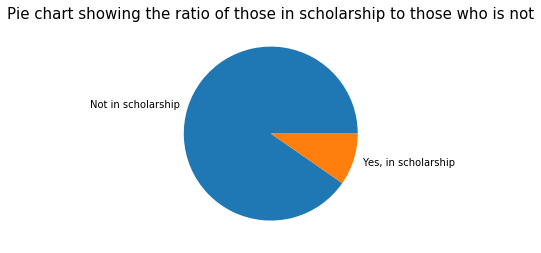

In [151]:
#get the number of Scholarship receipient that is No-show and plot on a pie chart
label_s= "Not in scholarship", "Yes, in scholarship"
title= 'Pie chart showing the ratio of those in scholarship to those who is not'
Scholarship = new_Df.groupby('Scholarship')['No-show_yes'].count()
plt.pie(Scholarship, labels =label_s)
plt.title(title, fontsize=15);
plt.show()

<b>From the plot above, it can be seen that if patients is not in Scholarship program, they are more likely to not show up for their appointment</b>

#### If hypertensive, do they show up?

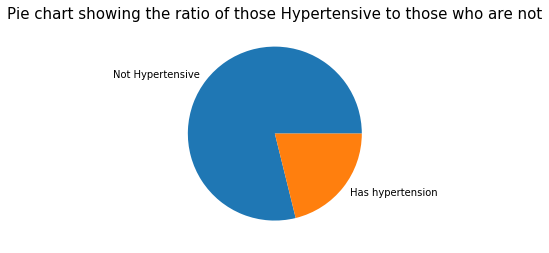

In [152]:
#get the number of Hipertension receipient that is No-show
Hipertension=new_Df.groupby('Hipertension')['No-show_yes'].count()
label_s=["Not Hypertensive", "Has hypertension"]
plt.pie(Hipertension, labels =label_s )
title='Pie chart showing the ratio of those Hypertensive to those who are not'
plt.title(title, fontsize=15);
plt.show()

<b>From the plot above, it can be seen that if patients is not Hipertensive, they are more likely to not show up for their appointment</b>

#### If diabetic, do they show up?

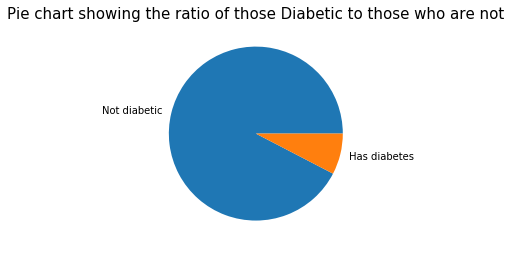

In [153]:
#get the number of Diabetic patient that is No-show
Diabetes=new_Df.groupby('Diabetes')['No-show'].count()
label_s=["Not diabetic", "Has diabetes"]
plt.pie(Diabetes, labels =label_s )
plt.title('Pie chart showing the ratio of those Diabetic to those who are not', fontsize=15);
plt.show()

<b>From the plot above, it can be seen that if patients is not Diabetic, they are more likely to not show up for their appointment</b>

#### If alcoholic, do they show up?

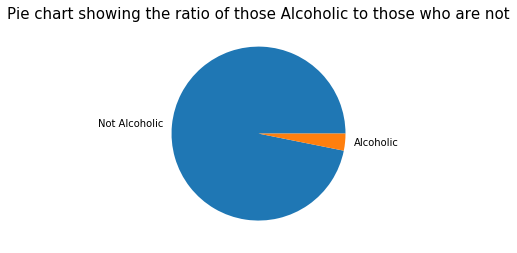

In [154]:
#get the number of Alcoholic that is No-show
Alcoholism = new_Df.groupby('Alcoholism')['No-show'].count()
label_s=["Not Alcoholic", "Alcoholic"]
plt.pie(Alcoholism, labels =label_s )
plt.title('Pie chart showing the ratio of those Alcoholic to those who are not', fontsize=15);
plt.show()

<b>From the plot above, it can be seen that if patients is not alcoholic, they are more likely to not show up for their appointment</b>

#### If they receive SMS, do they show up?

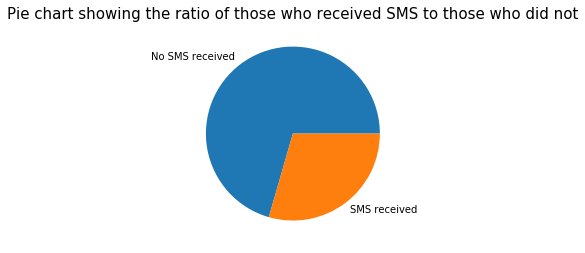

In [155]:
#get the number of people that received SMS that is No-show
SMS_received = new_Df.groupby('SMS_received')['No-show'].count()
label_s=["No SMS received", "SMS received"]
plt.pie(SMS_received, labels =label_s)
plt.title('Pie chart showing the ratio of those who received SMS to those who did not', fontsize=15);
plt.show()

<b>From the plot above, it can be seen that if patients did not receive SMS, they are more likely to not show up for their appointment</b>

#### #People that don't show up , what day do they mostly schedule their appointment?

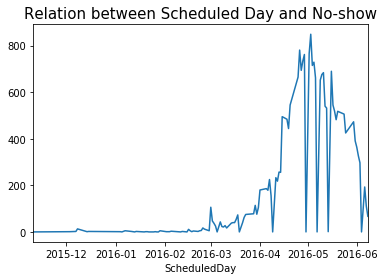

In [156]:
#People that don't show up , what day do they mostly schedule their appointment?
df.groupby(['ScheduledDay'])['No-show_yes'].sum().plot()
plt.title('Relation between Scheduled Day and No-show', fontsize=15);

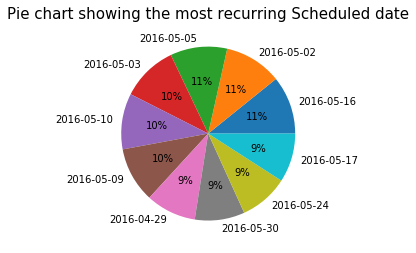

In [157]:
#People that don't show up , what day do they mostly schedule their appointment?
title = 'Pie chart showing the most recurring Scheduled date' 
pie_chart(new_Df['ScheduledDay'],title)


<b>The most common scheduled date is 2016-05-05, 2016-05-16, and 2016-05-02  </b>

#### People that don't show up , what day do they mostly have their appointment day?

In [158]:
##People that don't show up , what day do they mostly have their appointment day?
new_Df['AppointmentDay'].value_counts().nlargest(10)


2016-06-06    3677
2016-06-08    3587
2016-06-01    3547
2016-05-30    3497
2016-05-11    3478
2016-06-07    3454
2016-06-02    3410
2016-05-16    3410
2016-05-12    3400
2016-05-31    3397
Name: AppointmentDay, dtype: int64

<b> 2016-06-06 is the most recurring date </b>

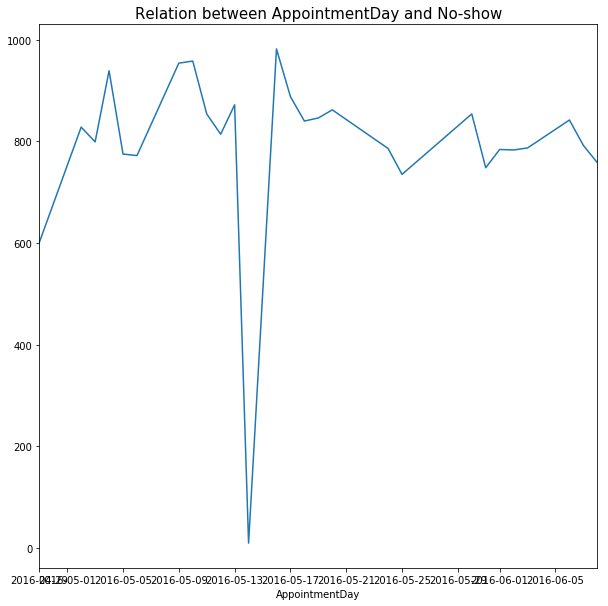

In [159]:
df.groupby(['AppointmentDay'])['No-show_yes'].sum().plot(figsize=(10,10))
plt.title('Relation between AppointmentDay and No-show', fontsize=15);

## Conclusion
 

 

 #### After exploring this dataset, listed below are what i found out:
 
 1)Females are more likely to not show up for their appointment
 2)The Scheduled date with the highest number of patients that did not show up for their appointment is 2016-05
 3)The Appointment date with the highest number of patients that did not show up for their appointment is 2016-05-17
 4)Age 60 and above are more likely to show up for their appointments
 5)The most common location of patient not showing up for their appointment is JARDIM CAMBURI
 6)people with scholarship are more likely to show up for their appointment 
 7)people with Hipertension are more likely to show up for their appointment 
 8)people with diabetes are more likely to show up for their appointment 
 9)people that are alcoholic are more likely to show up for their appointment 
 10)people that received SMS are more likely to show up for their appointment 

In [160]:
new_Df['ScheduledDay'].min()

datetime.date(2015, 11, 10)

In [161]:
new_Df['ScheduledDay'].max()

datetime.date(2016, 6, 8)

#### Limitation:
The dataset consist of data from just 2015, 11, 10 to 2016, 6, 8